In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn

print("Libraries imported successfully")

Libraries imported successfully


In [14]:
# The number of cars sold
carNum = [3, 4, 5, 6, 7, 8, 9]
carnumNP = np.array(carNum, dtype = np.float32)

#carPricesNP.ndim

carNumNP = carPricesNP.reshape(-1, 1)
carNumNP

# convert the numpy array to tensor
carNumT = Variable(torch.from_numpy(carNumNP))
print(carNumT)

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [15]:
# lets define the prices of car sell
carPrices = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
carPricesNP = np.array(carPrices, dtype = np.float32)
carPricesNP = carPricesNP.reshape(-1, 1)

# convert the numpy array to tensor
carPricesT = Variable(torch.from_numpy(carPricesNP))
carPricesT

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

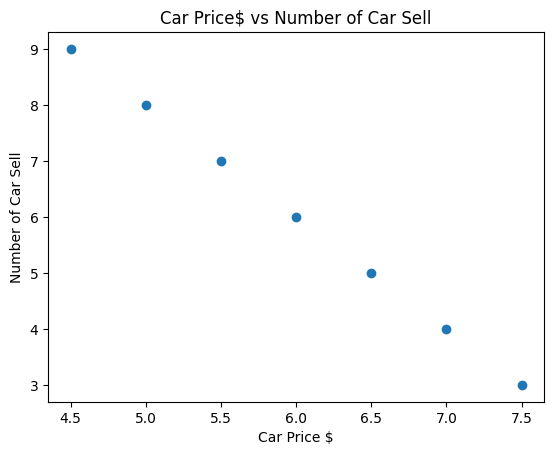

In [16]:
# let's visualize our data
plt.scatter(carPrices, carNum)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ vs Number of Car Sell")
plt.show()

In [20]:
# create a class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
        

In [21]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [22]:
# define the loss function
mse = nn.MSELoss()

In [23]:
# set optimization parameters
lr = 0.02     # setting the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [24]:
# Train the model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(carPricesT)
    
    # calculate loss
    loss = mse(results, carNumT)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if (iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 13.63255500793457
epoch 50, loss 7.5497565269470215
epoch 100, loss 6.794569969177246
epoch 150, loss 6.114922523498535
epoch 200, loss 5.50325870513916
epoch 250, loss 4.95277738571167
epoch 300, loss 4.457361698150635
epoch 350, loss 4.011500835418701
epoch 400, loss 3.6102375984191895
epoch 450, loss 3.2491118907928467
epoch 500, loss 2.9241087436676025
epoch 550, loss 2.6316165924072266
epoch 600, loss 2.368381977081299
epoch 650, loss 2.131476879119873
epoch 700, loss 1.9182683229446411
epoch 750, loss 1.7263872623443604
epoch 800, loss 1.5537010431289673
epoch 850, loss 1.3982874155044556
epoch 900, loss 1.2584174871444702
epoch 950, loss 1.1325401067733765
epoch 1000, loss 1.0192549228668213


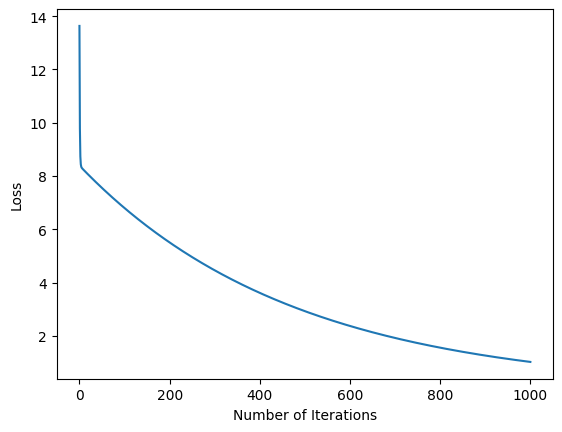

In [25]:
# plot to see how the loss function falls
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()